<a href="https://colab.research.google.com/github/tarun1208/BasicML/blob/main/sih_ipynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset (replace 'crop_data.csv' with your file)
df = pd.read_csv('/content/crop_yield_with_temperature.csv')

# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0       Crop  Crop_Year  Season   State      Area  Production  \
0           0  Arhar/Tur       1997  Autumn  Odisha   25621.0        6487   
1           1  Arhar/Tur       1997  Summer  Odisha   86559.0       16414   
2           2  Arhar/Tur       1997  Winter  Odisha  116553.0       23305   
3           3  Groundnut       1997  Autumn  Odisha   37462.0       34433   
4           4  Groundnut       1997  Summer  Odisha   39729.0       48815   

   Annual_Rainfall   Fertilizer  Pesticide     Yield  Temperature  
0           1496.6   2438350.57    7942.51  0.202778    21.890000  
1           1496.6   8237820.03   26833.29  0.216786    25.690000  
2           1496.6  11092349.01   36131.43  0.198929    19.876667  
3           1496.6   3565258.54   11613.22  0.840435    21.890000  
4           1496.6   3781008.93   12315.99  1.211071    25.690000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 12 columns):
 #   Column           No

In [2]:
print(df.isnull().sum())

Unnamed: 0         0
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
Temperature        0
dtype: int64


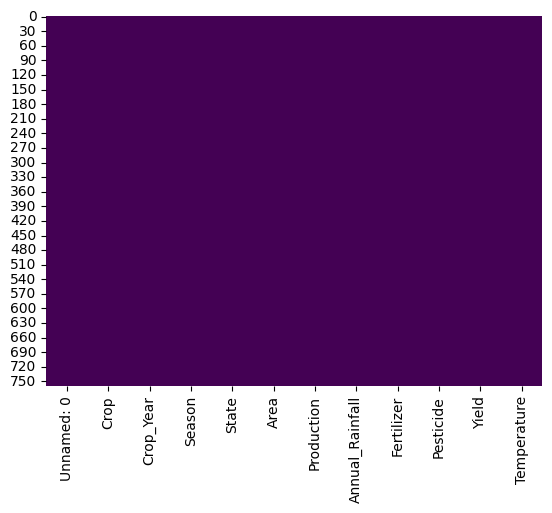

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [4]:
# Using One-Hot Encoding
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State'], drop_first=True)

In [5]:
# Features (all except Yield)
X = df.drop('Yield', axis=1)

# Target
y = df['Yield']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 0.6209495928389696
R2 Score: 0.9948286881582264


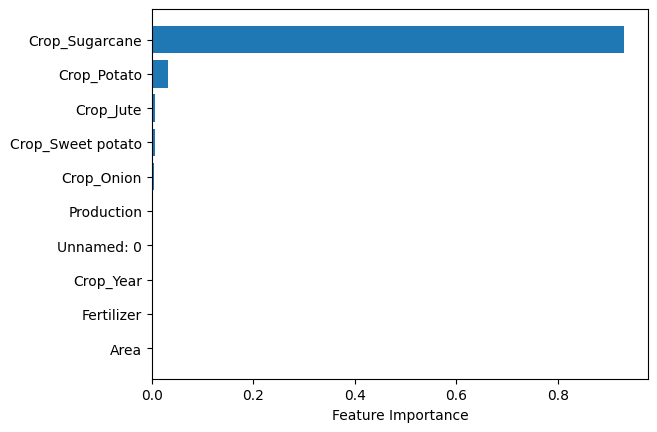

In [9]:
import matplotlib.pyplot as plt
import numpy as np

importance = model.feature_importances_
features = X.columns

indices = np.argsort(importance)[-10:]  # Top 10 features
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()
